In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5
from astropy.coordinates import Angle, Latitude, Longitude
from scipy import stats
from astropy.table import Table, Column
from astropy.io import ascii, fits
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
from scipy.stats import kde
import matplotlib.colors as clr
import fitsio
from fitsio import FITS,FITSHDR


### Isolate 47tuc from field 4

In [2]:
#cat = fits.getdata('FieldXX_combined_allobj.fits.gz',1)  # of stars version

cat = fits.getdata('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/Field4_combined_allobj.fits.gz',1)


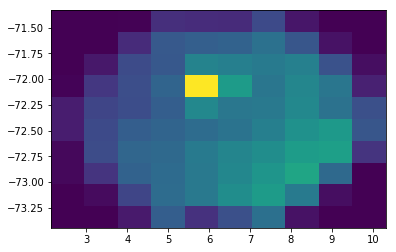

In [3]:
plt.hist2d(cat['ra'],cat['dec'])
plt.show()

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


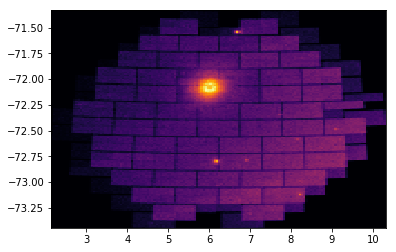

In [4]:
hess = stats.binned_statistic_2d(cat['ra'], cat['dec'], None, 'count',bins=150)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
plt.show()

In [5]:
ra_center = 6
dec_center = -72.07


In [6]:
radius = -71.87 - dec_center

In [7]:
c_center = SkyCoord(ra_center,dec_center,unit='deg')
c_field = SkyCoord(cat['ra'],cat['dec'],unit='deg')

In [8]:
sep = c_field.separation(c_center)

In [9]:
sep = sep.degree

In [10]:
ind, = np.where( sep < radius)

In [11]:
clustercat = cat[ind]

In [12]:
u_g = clustercat['U']-clustercat['G']
g_r = clustercat['G']-clustercat['R']
g_i = clustercat['G']-clustercat['I']

In [13]:
u_g_cut = u_g[~np.isnan(u_g)]
g_r_cut = g_r[~np.isnan(u_g)]
g_r= g_r_cut[~np.isnan(g_r_cut)]
u_g = u_g_cut[~np.isnan(g_r_cut)]



/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


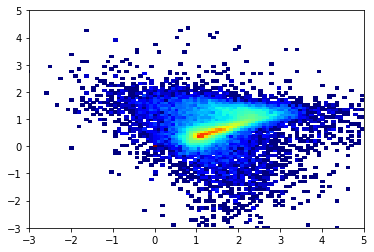

In [14]:
hess = stats.binned_statistic_2d(u_g, g_r, None, 'count',bins=2000)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='jet',norm=clr.LogNorm())
plt.xlim(-3,5)
plt.ylim(-3,5)
plt.show()

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


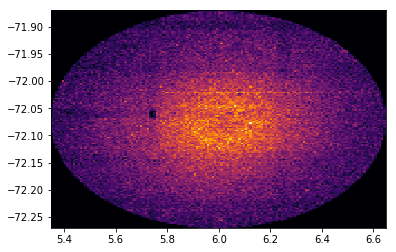

In [15]:
hess = stats.binned_statistic_2d(clustercat['ra'], clustercat['dec'], None, 'count',bins=150)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
plt.show()

In [16]:
g_i = clustercat['G']-clustercat['I']
g =clustercat['G']

In [17]:
g_i_cut = g_i[~np.isnan(g_i)]
g_cut = g[~np.isnan(g_i)]
g = g_cut[~np.isnan(g_cut)]
g_i = g_i_cut[~np.isnan(g_cut)]

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


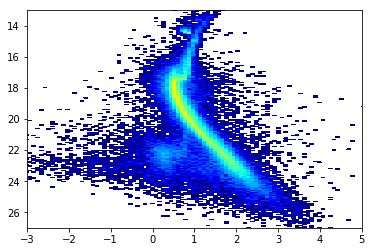

In [18]:
fig, ax = plt.subplots()
hess = stats.binned_statistic_2d(g_i,g, None, 'count',bins=2000)
ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='jet',norm=clr.LogNorm())
ax.set_xlim(-3,5)
ax.set_ylim(13,27)
ax.invert_yaxis()


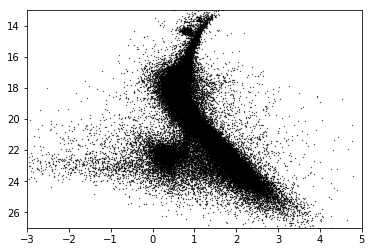

In [19]:
fig, ax = plt.subplots()
ax.scatter(g_i,g,s=0.1,c='k')
ax.set_xlim(-3,5)
ax.set_ylim(13,27)
ax.invert_yaxis()


### Try to decrease radius of cluster and see if that helps

In [20]:
ra_center = 6.01711
dec_center = -72.0761
top = -71.9867
radius = top - dec_center

In [21]:
c_center = SkyCoord(ra_center,dec_center,unit='deg')
c_field = SkyCoord(cat['ra'],cat['dec'],unit='deg')

In [22]:
sep = c_field.separation(c_center)

In [23]:
sep = sep.degree

In [24]:
ind, = np.where( sep < radius)

In [25]:
clustercat = cat[ind]

In [26]:
u_g = clustercat['U']-clustercat['G']
g_r = clustercat['G']-clustercat['R']
g_i = clustercat['G']-clustercat['I']
g = clustercat['G']

In [27]:
g_i_cut = g_i[~np.isnan(g_i)]
g_cut = g[~np.isnan(g_i)]
g = g_cut[~np.isnan(g_cut)]
g_i = g_i_cut[~np.isnan(g_cut)]

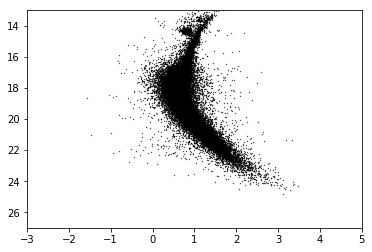

In [28]:
fig, ax = plt.subplots()
ax.scatter(g_i,g,s=0.1,c='k')
ax.set_xlim(-3,5)
ax.set_ylim(13,27)
ax.invert_yaxis()


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


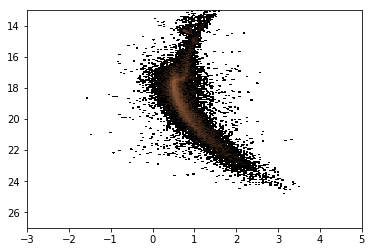

In [29]:
fig, ax = plt.subplots()
hess = stats.binned_statistic_2d(g_i,g, None, 'count',bins=5000)
ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='copper',norm=clr.LogNorm())
ax.set_xlim(-3,5)
ax.set_ylim(13,27)
ax.invert_yaxis()


In [30]:
clustercat

FITS_rec([('Field4.324840', 5.92003181, -72.02990965, 0.00601534, 0.00601534, 1.1148878e-02, 1.7765693e-02, 29, 3, [ 4684445,  4707619,  4730391,  4753867,  4776610,  4799006,  4945939,  4964634,  4983070, 31119177, 31150043, 31190429, 31234646, 31277926, 31300751, 32840370, 32898528, 32965852, 33035416, 33095834, 31802618, 31862767, 31927550, 31992612, 32046575, 31537022, 31567844, 31601436, 31631088,       -1,       -1,       -1,       -1,       -1,       -1], [ 4684445,  4707619,  4730391,  4753867,  4776610,  4799006,       -1,       -1,       -1,       -1,       -1,       -1,  4945939,  4964634,  4983070, 31119177, 31150043, 31190429, 31234646, 31277926, 31300751, 32840370, 32898528, 32965852, 33035416, 33095834, 31802618, 31862767, 31927550, 31992612, 32046575, 31537022, 31567844, 31601436, 31631088], 20.219248, 0.01530726,  0.18603517, 6, 18.908257, 4.3724328e-03,  0.26115683, 7, 18.454927, 3.7274184e-03,  0.14636119, 8, 18.323788, 5.2688969e-03, 2.5871366e-02, 4, 18.215715, 0.0

In [52]:
#creat fits file with star data
array_list = [clustercat['RA'],clustercat['DEC'],clustercat['U'],clustercat['UERR'],clustercat['G'],clustercat['GERR'],clustercat['R'],clustercat['RERR'],clustercat['I'],clustercat['IERR'],clustercat['Z'],clustercat['ZERR'],clustercat['EBV'],clustercat['CHI'],clustercat['SHARP'],clustercat['PROB']]
names = ['RA','DEC','U','UERR','G','GERR','R','RERR','I','IERR','Z','ZERR','EBV','CHI','SHARP','PROB']
fitsio.write('~/research/SMASH_project/datafiles/47tuc_stars.fits',array_list,names=names)



### Isolate NGC 362 from field 9

In [32]:
field9 = fits.getdata('/Users/amyel/research/SMASH_project/datafiles/SMASH_fields/vsix/Field9_combined_allobj.fits.gz',1)


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


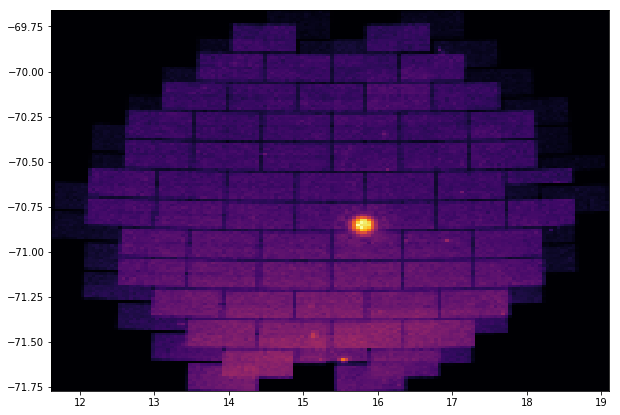

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
hess = stats.binned_statistic_2d(field9['ra'], field9['dec'], None, 'count',bins=150)
ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')


In [33]:
ra_center = 15.81
dec_center = -70.85
top = -70.79
radius = top - dec_center

In [34]:
c_center = SkyCoord(ra_center,dec_center,unit='deg')
c_field = SkyCoord(field9['ra'],field9['dec'],unit='deg')

In [35]:
sep = c_field.separation(c_center)

In [36]:
sep = sep.degree

In [37]:
ind, = np.where( sep < radius)

In [38]:
NGC362 = field9[ind]

In [47]:
g_i = NGC362['G']-NGC362['I']
g = NGC362['G']

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


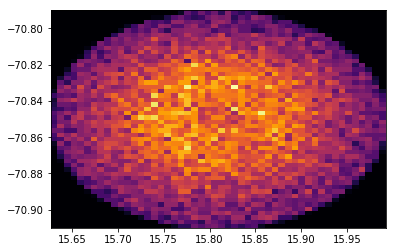

In [48]:
hess = stats.binned_statistic_2d(NGC362['ra'], NGC362['dec'], None, 'count',bins=50)
plt.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='inferno')
plt.show()

In [49]:
g_i_cut = g_i[~np.isnan(g_i)]
g_cut = g[~np.isnan(g_i)]
g = g_cut[~np.isnan(g_cut)]
g_i = g_i_cut[~np.isnan(g_cut)]

/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


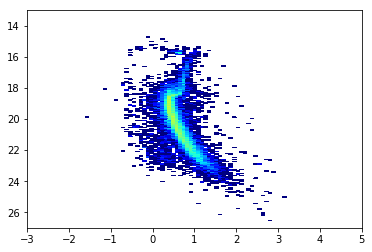

In [50]:
fig, ax = plt.subplots()
hess = stats.binned_statistic_2d(g_i,g, None, 'count',bins=2000)
ax.pcolormesh(hess.x_edge,hess.y_edge,hess.statistic.T,cmap='jet',norm=clr.LogNorm())
ax.set_xlim(-3,5)
ax.set_ylim(13,27)
ax.invert_yaxis()


In [53]:
#creat fits file with star data
array_list = [NGC362['RA'],NGC362['DEC'],NGC362['U'],NGC362['UERR'],NGC362['G'],NGC362['GERR'],NGC362['R'],NGC362['RERR'],NGC362['I'],NGC362['IERR'],NGC362['Z'],NGC362['ZERR'],NGC362['EBV'],NGC362['CHI'],NGC362['SHARP'],NGC362['PROB']]
names = ['RA','DEC','U','UERR','G','GERR','R','RERR','I','IERR','Z','ZERR','EBV','CHI','SHARP','PROB']
fitsio.write('~/research/SMASH_project/datafiles/NGC362_stars.fits',array_list,names=names)

